<a href="https://colab.research.google.com/github/Archita0304/DeepLearning/blob/main/Modifications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1
import numpy as np

def sigmoid(x): return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x): return x * (1 - x)

class MLP:
    def __init__(self):
        self.w1 = np.random.rand(2, 2)
        self.w2 = np.random.rand(2, 1)

    def train(self, X, y, epochs=10000):
        for _ in range(epochs):
            hidden = sigmoid(np.dot(X, self.w1))
            output = sigmoid(np.dot(hidden, self.w2))
            output_error = y - output
            self.w2 += np.dot(hidden.T, output_error * sigmoid_derivative(output))
            hidden_error = np.dot(output_error, self.w2.T)
            self.w1 += np.dot(X.T, hidden_error * sigmoid_derivative(hidden))

    def predict(self, x):
        hidden = sigmoid(np.dot(x, self.w1))
        return sigmoid(np.dot(hidden, self.w2))


X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

mlp = MLP()
mlp.train(X, y)
print("XOR Results:")
for test in X:
    result = np.round(mlp.predict(test)[0])
    print(f"XOR({test[0]}, {test[1]}) = {int(result)}")



XOR Results:
XOR(0, 0) = 0
XOR(0, 1) = 0
XOR(1, 0) = 1
XOR(1, 1) = 0


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training with SGD Optimizer:

Training with Adam Optimizer:


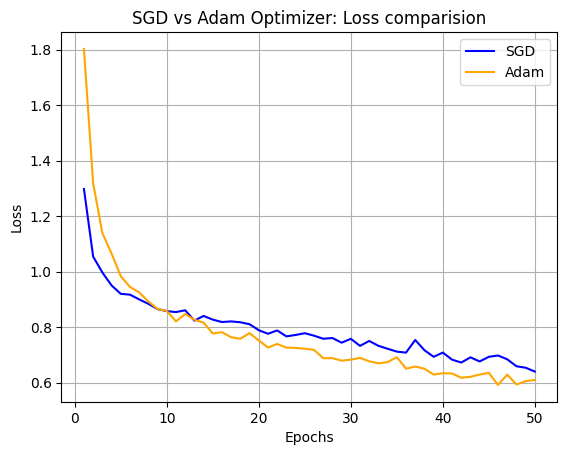

In [ ]:
#2
#modification : used callbacks function and BatchNormalization
import tensorflow as tf
from tensorflow.keras import layers,models,optimizers
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

def create_data():
    X=np.random.randn(1000,10)
    y=np.random.randn(1000,1)
    return X,y

def create_model():
  model = models.Sequential([
      layers.Dense(50,activation='relu',input_shape=(10,)),
      layers.BatchNormalization(),
      layers.Dense(20,activation='relu'),
      layers.BatchNormalization(),
      layers.Dense(1)
  ])
  return model

def train_model(model,optimizer,X,y,batch_size,epochs,optimizer_name):
  model.compile(optimizer=optimizer,loss='mean_squared_error')
  stop=EarlyStopping(monitor='loss',patience=10,restore_best_weights=True)
  history=model.fit(X,y,batch_size=batch_size,epochs=epochs,verbose=0,callbacks=[stop])
  return history.history['loss']


  for epoch in range(epochs):
    hist=model.fit(X,y,batch_size=batch_size,epochs=1,verbose=0)
    loss=hist.history['loss'][0]
    history.append(loss)
    print(f"Epoch {epoch+1}/{epochs}-{optimizer_name} Loss:{loss:4f}")
  return history

X,y=create_data()
model_sgd=create_model()
model_adam=create_model()
optimizer_sgd=optimizers.SGD(learning_rate=0.01)
optimizer_adam=optimizers.Adam(learning_rate=0.001)

epochs=50
batch_size=32

print("\nTraining with SGD Optimizer:")
sgd_loss=train_model(model_sgd,optimizer_sgd,X,y,batch_size,epochs,'SGD')

print("\nTraining with Adam Optimizer:")
adam_loss=train_model(model_adam,optimizer_adam,X,y,batch_size,epochs,'Adam')
plt.plot(range(1,epochs+1),sgd_loss,label='SGD',color='blue')
plt.plot(range(1,epochs+1),adam_loss,label='Adam',color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('SGD vs Adam Optimizer: Loss comparision')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 35ms/step - accuracy: 0.8969 - loss: 0.3337 - val_accuracy: 0.9871 - val_loss: 0.0379
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 33ms/step - accuracy: 0.9844 - loss: 0.0468 - val_accuracy: 0.9877 - val_loss: 0.0386
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.9906 - loss: 0.0301 - val_accuracy: 0.9910 - val_loss: 0.0278
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9868 - loss: 0.0363
Test Accuracy:0.9909999966621399


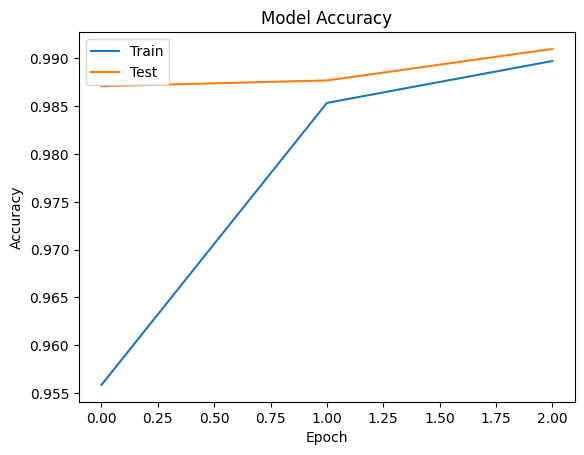

Test Loss:0.027843432500958443


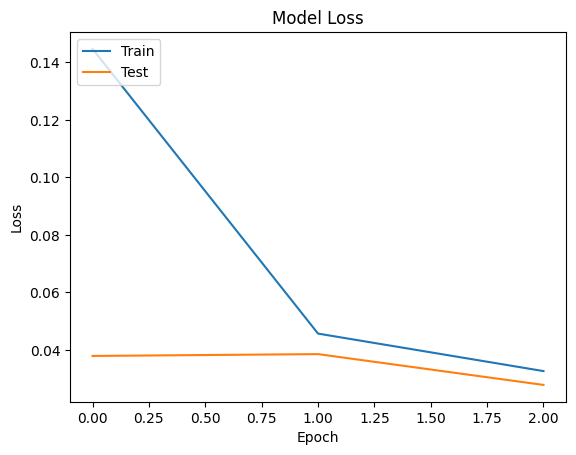

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9924 - loss: 0.0233 - val_accuracy: 0.9889 - val_loss: 0.0343
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9940 - loss: 0.0190 - val_accuracy: 0.9918 - val_loss: 0.0271
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 34ms/step - accuracy: 0.9949 - loss: 0.0154 - val_accuracy: 0.9889 - val_loss: 0.0344
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9852 - loss: 0.0420
Test Accuracy:0.9889000058174133


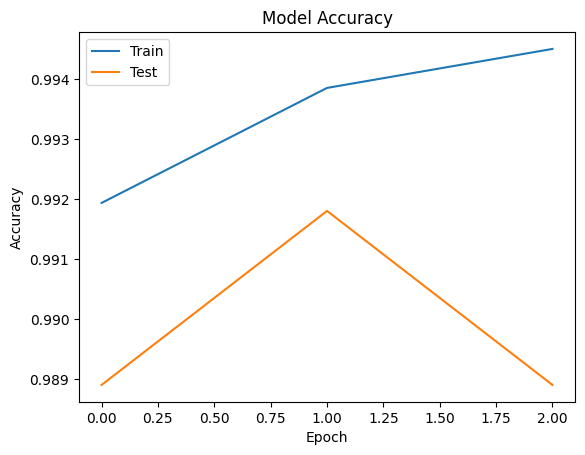

Test Loss:0.034385278820991516


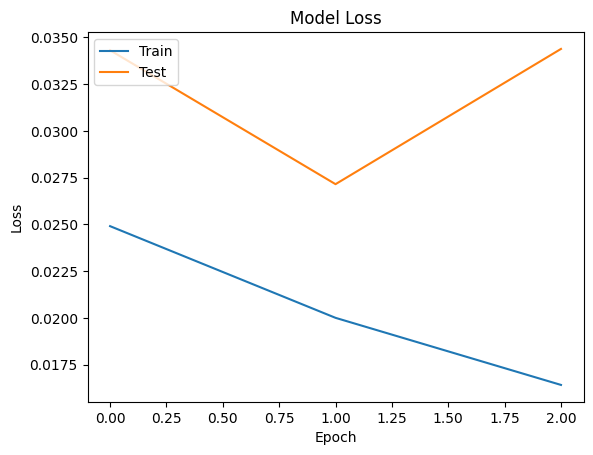

In [ ]:
#3 used average pooling
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

(train_imgs,train_labels),(test_imgs,test_labels)=datasets.mnist.load_data()
train_imgs=train_imgs.reshape((train_imgs.shape[0],28,28,1)).astype('float32')/255
test_imgs=test_imgs.reshape((test_imgs.shape[0],28,28,1)).astype('float32')/255

model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hist_max=model.fit(train_imgs,train_labels,epochs=3,validation_data=(test_imgs,test_labels))
test_loss,test_acc=model.evaluate(test_imgs,test_labels)
print(f'Test Accuracy:{test_acc}')

plt.plot(hist_max.history['accuracy'])
plt.plot(hist_max.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

print(f'Test Loss:{test_loss}')

plt.plot(hist_max.history['loss'])
plt.plot(hist_max.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

model_avg_pool = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.AveragePooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.AveragePooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_avg_pool.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

hist_avg=model.fit(train_imgs,train_labels,epochs=3,validation_data=(test_imgs,test_labels))
test_loss1,test_acc1=model.evaluate(test_imgs,test_labels)
print(f'Test Accuracy:{test_acc1}')

plt.plot(hist_avg.history['accuracy'])
plt.plot(hist_avg.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

print(f'Test Loss:{test_loss1}')

plt.plot(hist_avg.history['loss'])
plt.plot(hist_avg.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Test'],loc='upper left')
plt.show()



# ***pgrm 4***

broccoli: 3
keyboard: 10
dining table: 3
toilet: 8
laptop: 7
tv: 2
person: 4
banana: 4
sink: 2
tie: 2
mouse: 2
Unknown label: 84 (count: 1)
cup: 1
Unknown label: 81 (count: 2)
bed: 1
kite: 1
bird: 4
oven: 2
surfboard: 1
car: 2
Unknown label: 90 (count: 1)
elephant: 1
orange: 1
skis: 1
potted plant: 1
horse: 1


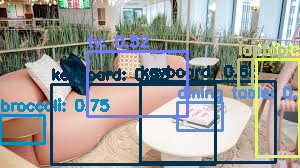

In [ ]:
import torch
import torchvision
import cv2
import numpy as np
from torchvision.transforms import functional as F
#from google.colab.patches import cv2_imshow
 # Commented out as it's likely not needed outside of Google Colab
import random
from collections import Counter
import matplotlib.pyplot as plt

# Load the pre-trained model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# COCO category names
coco_cat_names = ['__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
                  'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign',
                  'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
                  'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag',
                  'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite',
                  'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
                  'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana',
                  'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
                  'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table',
                  'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
                  'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock',
                  'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']

# Generate random colors for each label
colors = {name: tuple(random.choices(range(256), k=3)) for name in coco_cat_names}


# Function to detect objects and draw boxes
def detect_obj_with_colors(path, threshold=0.5):
    img = cv2.imread(path)
    if img is None:
        print(f'Error: Could not load image from {path}.')
        return None

    original_img = img.copy()
    img_tensor = F.to_tensor(img)
    with torch.no_grad():
        pred = model([img_tensor])

    boxes = pred[0]['boxes'].cpu().numpy()
    labels = pred[0]['labels'].cpu().numpy()
    scores = pred[0]['scores'].cpu().numpy()

    for i, box in enumerate(boxes):
        if scores[i] >= threshold:
            label = coco_cat_names[labels[i]]
            color = colors[label]
            start = (int(box[0]), int(box[1]))
            end = (int(box[2]), int(box[3]))
            # Draw the rectangle and label
            cv2.rectangle(original_img, start, end, color, 2)
            cv2.putText(original_img, f"{label}: {scores[i]:.2f}", (start[0], start[1] - 5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    return original_img, labels


# Function to count detected objects
def count_objects(labels):
    counts = Counter(labels)
    for obj, count in counts.items():
        if 0 <= obj < len(coco_cat_names):
            print(f"{coco_cat_names[obj]}: {count}")
        else:
            print(f"Unknown label: {obj} (count: {count})")  # Print a message for unknown labels
    return counts



# Main block
if __name__ == '__main__':
    path = '/content/img3.jpg'  # Path to the image
    detected_image, detected_labels = detect_obj_with_colors(path)  # Updated to unpack labels


    if detected_image is not None:
        # Count objects
        counts = count_objects(detected_labels)

        # Display the image
        cv2_imshow(detected_image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()


In [ ]:
import torch
import torchvision
import cv2
import numpy as np
from torchvision.transforms import functional as F
import random
from collections import Counter
import matplotlib.pyplot as plt

# Load the pre-trained model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# COCO category names
coco_cat_names = ['__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
                  'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign',
                  'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
                  'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag',
                  'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite',
                  'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
                  'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana',
                  'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
                  'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table',
                  'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
                  'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock',
                  'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


# Function to detect objects and draw boxes
def detect_obj_with_colors(path, threshold=0.5):
    img = cv2.imread(path)
    if img is None:
        print(f'Error: Could not load image from {path}.')
        return None, []

    original_img = img.copy()
    img_tensor = F.to_tensor(img)
    with torch.no_grad():
        pred = model([img_tensor])

    boxes = pred[0]['boxes'].cpu().numpy()
    labels = pred[0]['labels'].cpu().numpy()
    scores = pred[0]['scores'].cpu().numpy()
    detected_labels = []

    for i, box in enumerate(boxes):
        if scores[i] >= threshold:
            label = coco_cat_names[labels[i]]
            start = (int(box[0]), int(box[1]))
            end = (int(box[2]), int(box[3]))
            detected_labels.append(labels[i])

            # Draw rectangle
            cv2.rectangle(original_img, start, end, (0, 255, 0), 1)

            # Display label below the box
            label_position = (start[0], end[1] + 15)
            cv2.putText(original_img, f"{label}: {scores[i]:.2f}", label_position,
                        cv2.FONT_HERSHEY_SIMPLEX, 0.3, (128,0,0), 1)

    return original_img, detected_labels

# Function to count detected objects
def count_objects(labels):
    counts = Counter(labels)
    obj_list = [(coco_cat_names[obj], count) for obj, count in counts.items() if 0 <= obj < len(coco_cat_names)]
    print("Detected Object Counts:", obj_list)
    return obj_list

# Display image with matplotlib
def display_image_with_matplotlib(image):
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Main block
if __name__ == '__main__':
    path = '/content/cat.jpg'  # Path to the image
    detected_image, detected_labels = detect_obj_with_colors(path)

    if detected_image is not None:
        object_counts = count_objects(detected_labels)
        display_image_with_matplotlib(detected_image)
        print("Object Counts (List):", object_counts)


IndexError: list index out of range